In [1]:
# importing necessary libraries
import pandas as pd # for analyzing the data
import numpy as np
import seaborn as sns # for data visualization

In [2]:
# loading the data
cancer_df=pd.read_csv('C:\\Users\\MADHUSMITA\\Desktop\\data\\datasets_474_966_haberman.csv', header=None, names=['age', 'year_of_operation', 'number_of_positive_lymph_nodes', 'survival_status_5_years'])

In [3]:
# viewing what's inside the dataset
cancer_df.head()

,age,year_of_operation,number_of_positive_lymph_nodes,survival_status_5_years
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In the dataset there are 4 columns. First column gives information about patient's age (numerical data), Second column gives information about the year of operation, third column gives infomation about number of positive axillary lymph nodes detected, fourth column is a classification column which shows whether the patient survived more than 5 years after operation(class=1) or not(class=2).

In [4]:
# getting information about the dataset
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   age                             306 non-null    int64
 1   year_of_operation               306 non-null    int64
 2   number_of_positive_lymph_nodes  306 non-null    int64
 3   survival_status_5_years         306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


So we see that there are 306 entries in each column and no null values. 
The 4th column should be catagorical column which is integer. We can change this to catagorical entries.

In [6]:
# getting the unique values from the catagorical column
cancer_df['survival_status_5_years'].unique()

array([1, 2], dtype=int64)

That means there are just two unique values where 1 stands for surviving for 5 years or more and 2 stands for dying within 5 years. Let's change this column into a catagorical one as this is the target column

In [7]:
cancer_df['survival_status_5_years'] = cancer_df['survival_status_5_years'].map({1:'Survived 5 years or more', 2:'died within five years'})
cancer_df['survival_status_5_years'] = cancer_df['survival_status_5_years'].astype('category')

In [8]:
cancer_df.head()

,age,year_of_operation,number_of_positive_lymph_nodes,survival_status_5_years
0,30,64,1,Survived 5 years or more
1,30,62,3,Survived 5 years or more
2,30,65,0,Survived 5 years or more
3,31,59,2,Survived 5 years or more
4,31,65,4,Survived 5 years or more


In [29]:
print(cancer_df['survival_status_5_years'].value_counts())

Survived 5 years or more    225
died within five years       81
Name: survival_status_5_years, dtype: int64


225 patients survived and 81 patients did not survive after the operation

In [28]:
# let's get some statistical overview of the data
cancer_df.describe()

,age,year_of_operation,number_of_positive_lymph_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


Observations
1. age of patients vary from 83 to 30 with a mean of 52.45
2. number of positive lymph nodes vary from 0 to 52. But 75% patients have lymph nodes less than 5 and 25% of patients do not have a lymph node.
3. This is a small dataset having 306 number of entries.

Objective
We need to predict the propability of a patient to survive after 5 years of operation or not(die within 5 years of operation)

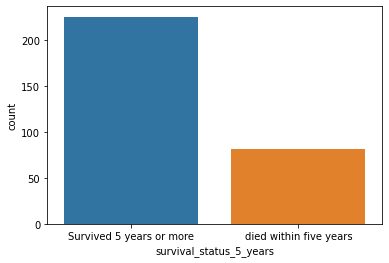

In [25]:
sns.countplot(x='survival_status_5_years',data=cancer_df)

From the countplot we can say that the number of survived patients are more than the number of not survived patients. More than 75% of patients survived.

Boxplots

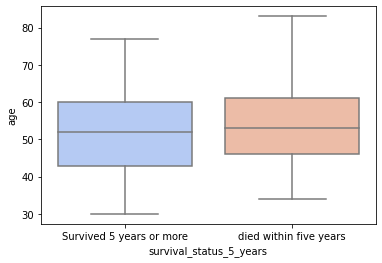

In [20]:
sns.boxplot(y="age", x="survival_status_5_years",data=cancer_df, palette="coolwarm")

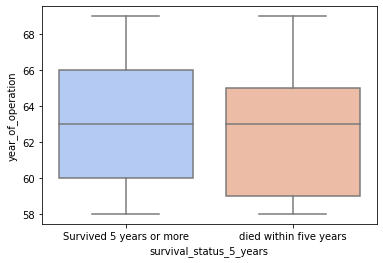

In [19]:
sns.boxplot(x="survival_status_5_years", y="year_of_operation",data=cancer_df, palette="coolwarm")

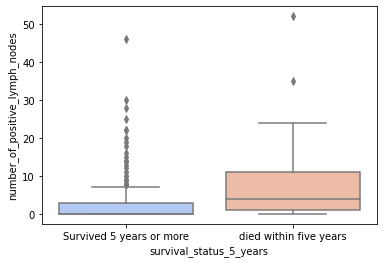

In [21]:
sns.boxplot(y="number_of_positive_lymph_nodes", x="survival_status_5_years",data=cancer_df, palette="coolwarm")

Observations from box plot
1. The patients of age more than 60 are more likely not to survive.
2. The patients treated after 1966 have more chance to survive. Patients treated after 1959 are more likely not to survive
3. The patients having number of lymph nodes between 0 to 4 have more chance to survive. More no. of peoples survived. 

In [31]:
print("Mean age of patients survived:", round(np.mean(cancer_df[cancer_df['survival_status_5_years'] == 'Survived 5 years or more']['age'])))
print("Mean age of patients not survived:", round(np.mean(cancer_df[cancer_df['survival_status_5_years'] == 'died within five years']['age'])))


Mean age of patients survived: 52.0
Mean age of patients not survived: 54.0


Scatterplot and Pairplots

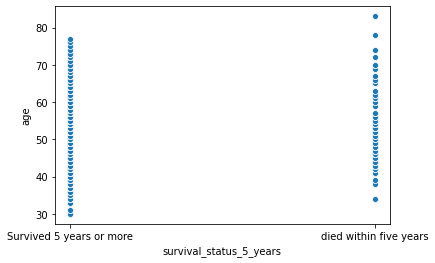

In [22]:
sns.scatterplot(x="survival_status_5_years", y="age", data=cancer_df,palette='Set1')

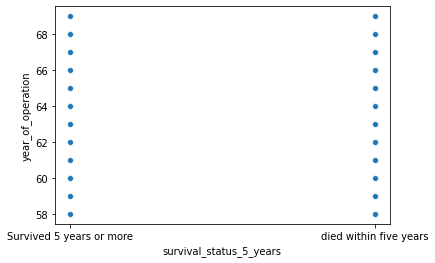

In [23]:
sns.scatterplot(x="survival_status_5_years", y="year_of_operation", data=cancer_df,palette='Set1')

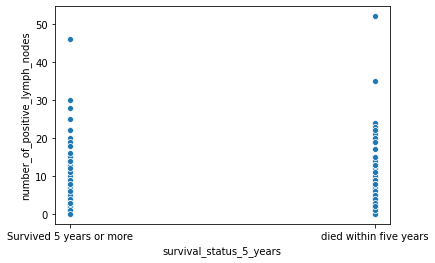

In [24]:
sns.scatterplot(x="survival_status_5_years", y="number_of_positive_lymph_nodes", data=cancer_df,palette='Set1')

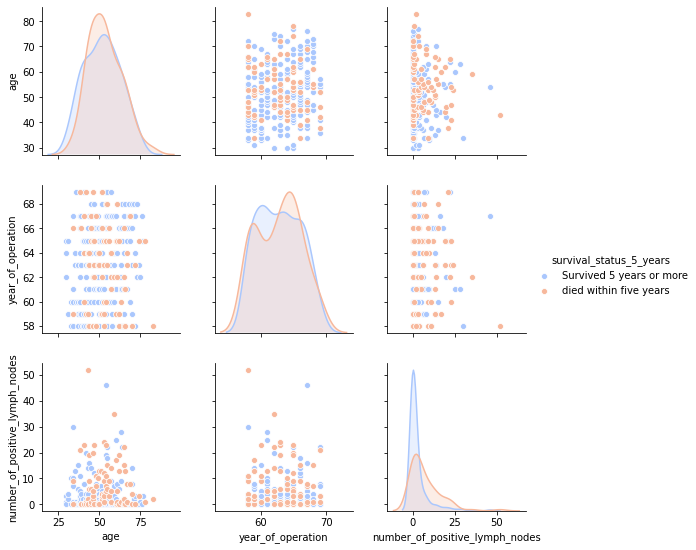

In [26]:
sns.pairplot(cancer_df,hue='survival_status_5_years',palette='coolwarm')

Observations
1.The people who are not survived tend to have more average number of lymph nodes and more spread out the distribution than survived.